## SMS classification

In [1]:
#%pip install -r ./requirements.txt

In [2]:
import pandas as pd
df = pd.read_csv("spam.csv")
df.shape

(5572, 2)

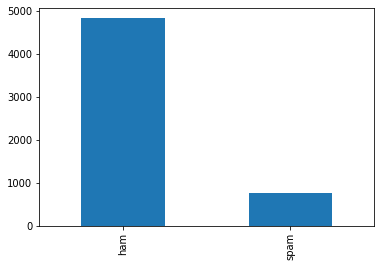

In [3]:
import matplotlib.pyplot as plt
df['Class'].value_counts().plot.bar()
plt.show()

## Clean Sentences

In [4]:
# Prepare cleaning functions
import re, string
import nltk
from nltk.stem import SnowballStemmer

stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

stemmer = SnowballStemmer('english')

def preProcessText(text):
    # lowercase and strip leading/trailing white space
    text = text.lower().strip()
    
    # remove HTML tags
    text = re.compile('<.*?>').sub('', text)
    
    # remove punctuation
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    
    # remove extra white space
    text = re.sub('\s+', ' ', text)
    
    return text

def lexiconProcess(text, stop_words, stemmer):
    filtered_sentence = []
    words = text.split(" ")
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(stemmer.stem(w))
    text = " ".join(filtered_sentence)
    
    return text

def cleanSentence(text, stop_words, stemmer):
    return lexiconProcess(preProcessText(text), stop_words, stemmer)

def cleanAllSentences(df):
    return [cleanSentence(item, stop_words, stemmer) for item in df.values]

In [5]:
df['Message'] = cleanAllSentences(df['Message'])

## Model Training

In [6]:
# Let's create a pipline using a random forest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

pipeline = Pipeline([
    ('text_vect', CountVectorizer(binary=True)),
    ('dt', RandomForestClassifier())                           
])

In [7]:
# And use the train_test_split to prepare the train test sets
# The df dataframe has been cleaned. 

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.1, shuffle=True, random_state=42)

X_train = train_data['Message']
y_train = train_data['Class']
X_test = test_data['Message']
y_test = test_data['Class']


In [8]:
# Fit the pipeline 
pipeline.fit(X_train, y_train)

Pipeline(steps=[('text_vect', CountVectorizer(binary=True)),
                ('dt', RandomForestClassifier())])

In [9]:
# Evaluate the pipeline on the test set
y_predict = pipeline.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       491
        spam       1.00      0.87      0.93        67

    accuracy                           0.98       558
   macro avg       0.99      0.93      0.96       558
weighted avg       0.98      0.98      0.98       558



## Test 

In [10]:
test = ['The movie was not worthy of my time, and I was very disappointed. The story was so dull and the characters were lame. ']

print('Prediction:', pipeline.predict(test)[0])

Prediction: ham


In [11]:
test = ['Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records.']
print('Prediction:', pipeline.predict(test)[0])

Prediction: spam


In [12]:
test = ['Congratulations! $500 claim now']
print('Prediction:', pipeline.predict(test)[0])

Prediction: spam
